# Projeto "Análise Pokémon" 2

**Descrição**: este projeto tem como objetivo praticar análise descritiva de dados com as bibliotecas "pandas" e "numpy".

Trabalharemos com um Dataset contendo os 100 Pokémons existentes até na 2ª geração do universo Pokémon. Faremos a análise da quantidade de Pokémons por tipo, as informações de batalha de cada Pokémon por tipo e a quantidade de Pokémons em relação ao nível de fraqueza contra cada tipo. 

Sobre os níveis de fraqueza, quanto maior o número, maior a fraqueza:
- 0.0: imune
- 0.25: muito resistente 
- 0.5: resistente 
- 1.0: irrelevante
- 2.0: fraco 
- 4.0: muito fraco 

Algumas perguntas levantadas:
- Quantos Pokémons pertencem a cada tipo (tanto tipo primário "type1" quanto secundário "type2")?
- Quais são as informações de batalha dos Pokémons de cada tipo?
- Quantos Pokémons são fracos ou resistentes a cada tipo?



<img src="banner.jpg" style="height:200px">

## 1. Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (10,5))

## 2. Coleta de dados

Trabalharemos com um Dataset contendo os 100 Pokémons da 2ª geração do universo Pokémon.

In [2]:
df_pkmn = pd.read_csv("dados/pokemon.csv", sep = ";")

In [3]:
df_pkmn.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
0,Chikorita,grass,none,45,49,65,49,65,45,2,...,318,45,Leaf Pokémon,1059860,0.9,Chicoritaチコリータ,88.1,152,6.4,0
1,Bayleef,grass,none,60,62,80,63,80,60,2,...,405,45,Leaf Pokémon,1059860,1.2,Bayleafベイリーフ,88.1,153,15.8,0
2,Meganium,grass,none,80,82,100,83,100,80,2,...,525,45,Herb Pokémon,1059860,1.8,Meganiumメガニウム,88.1,154,100.5,0
3,Cyndaquil,fire,none,39,52,43,60,50,65,2,...,309,45,Fire Mouse Pokémon,1059860,0.5,Hinoarashiヒノアラシ,88.1,155,7.9,0
4,Quilava,fire,none,58,64,58,80,65,80,2,...,405,45,Volcano Pokémon,1059860,0.9,Magmarashiマグマラシ,88.1,156,19.0,0


## 3. Exploração de dados

### 3.1 Tipos de Pokémon da segunda geração

In [4]:
# dataframe para as colunas type1 e type2
df_pkmn_gen2_type1 = pd.DataFrame(df_pkmn.type1.value_counts(), columns=['type1'])
df_pkmn_gen2_type2 = pd.DataFrame(df_pkmn.type2.value_counts(), columns=['type2'])
# tratando dados (removendo linha 'none')
df_pkmn_gen2_type2.drop(['none'], inplace = True)
# concatenando os dois dataframes
df_pkmn_gen2_both_types = pd.concat([df_pkmn_gen2_type1, df_pkmn_gen2_type2], sort=False, axis = 1)
# tratando dados (preenchendo dados NaN com 0)
df_pkmn_gen2_both_types = df_pkmn_gen2_both_types.fillna({'type1': 0,'type2': 0})
# criando coluna de soma
df_pkmn_gen2_both_types['sum'] = df_pkmn_gen2_both_types['type1'] + df_pkmn_gen2_both_types['type2']

In [5]:
df_pkmn_gen2_both_types

,type1,type2,sum
water,18.0,0.0,18.0
normal,15.0,0.0,15.0
bug,10.0,0.0,10.0
grass,9.0,1.0,10.0
fire,8.0,2.0,10.0
psychic,7.0,3.0,10.0
electric,6.0,2.0,8.0
fairy,5.0,3.0,8.0
dark,5.0,1.0,6.0
rock,4.0,3.0,7.0


#### 3.1.2 Representação em gráficos

In [6]:
# função
def criar_grafico_tipos(dataframe, cores, cor_borda, eixo_y, titulo):
    grafico = dataframe.plot(kind='bar', color=cores, ec=cor_borda, y=eixo_y)
    grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, horizontalalignment='right') # deixar nomes eixo x de lado 
    plt.title(titulo)
    plt.ylabel('Quantidade de Pokémons')
    plt.xlabel('Tipos')
    plt.show()

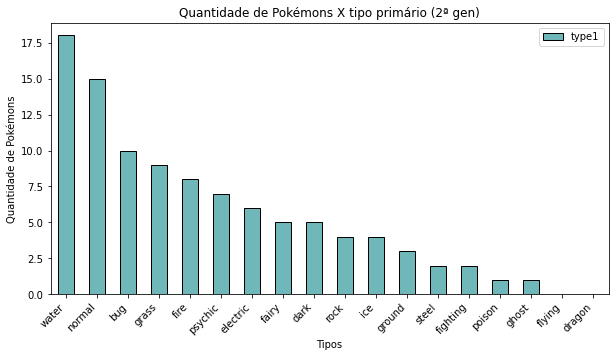

In [7]:
criar_grafico_tipos(df_pkmn_gen2_both_types, '#70B7BA', 'black', 'type1', "Quantidade de Pokémons X tipo primário (2ª gen)")

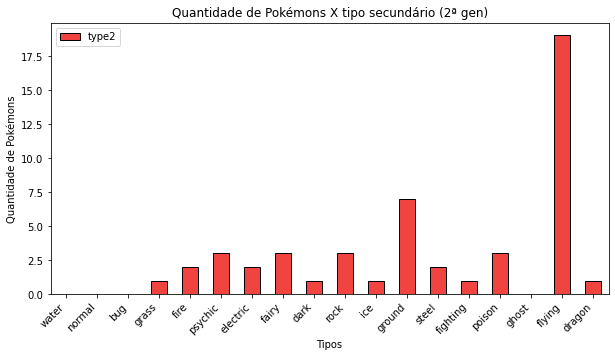

In [8]:
criar_grafico_tipos(df_pkmn_gen2_both_types, '#F1433F', 'black', 'type2', "Quantidade de Pokémons X tipo secundário (2ª gen)")

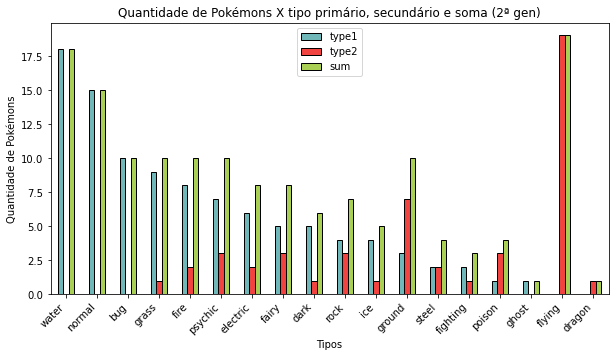

In [9]:
criar_grafico_tipos(df_pkmn_gen2_both_types, ['#70B7BA', '#F1433F', '#A9CF54'], 'black', ['type1','type2', 'sum'], "Quantidade de Pokémons X tipo primário, secundário e soma (2ª gen)")

### 3.2 Análise de Pokémons por tipo

Funções:

In [10]:
# função para criar dataframe com somente pkmns de certo tipo
def criar_df_pkmn_tipo(dataframe, tipo):
    selecao = dataframe['type1'] == tipo
    dataframe_type1 = dataframe[selecao]
    dataframe_type1
    selecao = dataframe['type2'] == tipo
    dataframe_type2 = dataframe[selecao]
    dataframe_type2
    dataframe_type = pd.concat([dataframe_type1, dataframe_type2], sort=False)
    return dataframe_type

In [11]:
# função para representar características de batalha dos pkmns em gráfico
def criar_grafico_pkmn_tipo(dataframe, cores, cor_borda, titulo):
    grafico = dataframe.plot(kind='bar', color = cores, ec=cor_borda, x='name',y=['hp', 'attack', 'defense', 'speed'])
    grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, horizontalalignment='right') # deixar nomes eixo x de lado 
    plt.title(titulo)
    plt.ylabel('Pontos')
    plt.xlabel('Pokémons')
    plt.ylim(0,200)

    plt.show()

In [12]:
# função para criar "series" que agrupa pkmns em função do nível de fraqueza contra certo tipo
def criar_series_fraquezas(dataframe, tipo):
    series = pd.Series(dataframe[tipo].value_counts())
    series.sort_index(ascending=True, inplace=True)
    return series

In [13]:
# função para criar "series" que agrupa pkmns em função do nível de fraqueza contra certo tipo (dividido em 3 faixas)
def criar_series_fraquezas_com_faixas(dataframe, tipo):
    faixas = [0, 0.5, 1.5, 5]
    labels = ['Resistentes', 'Indiferente', 'Fracos']
    recorte_against_fire = pd.cut(dataframe[tipo], faixas, include_lowest=True, labels=labels)
    series = recorte_against_fire.value_counts()
    series.sort_index(ascending=True, inplace=True)
    return series

In [14]:
# função para representar "series" de nível de fraqueza em gráfico
def criar_grafico_series_fraquezas(series, cores, titulo):
    series.plot(kind='bar', color = cores, ec='black')
    plt.title(titulo)
    plt.ylabel('Quantidade de Pokémons')
    plt.xlabel('Nível de fraqueza contra o tipo')
    plt.show()
    

In [15]:
# função para representar "series" de nível de fraqueza em gráfico de pizza
def criar_grafico_pizza_series_fraquezas(series, cores, titulo):
    series.plot(kind='pie', autopct = "%.2f%%", colors=cores, figsize=(10, 6))
    plt.title(titulo)
    plt.show()

## 1 Pokémons do tipo água 💧

In [20]:
df_pkmn_gen2_water = criar_df_pkmn_tipo(df_pkmn, 'water')
df_pkmn_gen2_water.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
6,Totodile,water,none,50,65,64,44,48,43,2,...,314,45,Big Jaw Pokémon,1059860,0.6,Waninokoワニノコ,88.1,158,9.5,0
7,Croconaw,water,none,65,80,80,59,63,58,2,...,405,45,Big Jaw Pokémon,1059860,1.1,Alligatesアリゲイツ,88.1,159,25.0,0
8,Feraligatr,water,none,85,105,100,79,83,78,2,...,530,45,Big Jaw Pokémon,1059860,2.3,Ordileオーダイル,88.1,160,88.8,0
18,Chinchou,water,electric,75,38,38,56,56,67,2,...,330,190,Angler Pokémon,1250000,0.5,Chonchieチョンチー,50.0,170,12.0,0
19,Lanturn,water,electric,125,58,58,76,76,67,2,...,460,75,Light Pokémon,1250000,1.2,Lanternランターン,50.0,171,22.5,0


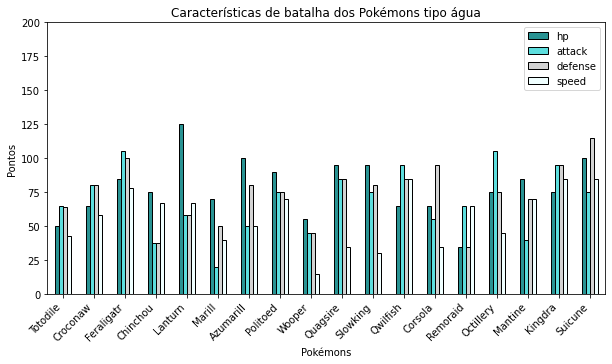

In [21]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_water, ['#299393', '#5DDEDE', 'lightgray', '#F0FFFF'], 'black', "Características de batalha dos Pokémons tipo água")

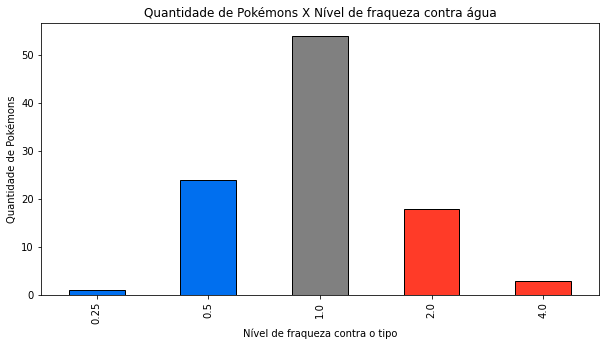

In [22]:
series_fraqueza_water = criar_series_fraquezas(df_pkmn, 'against_water')
criar_grafico_series_fraquezas(series_fraqueza_water, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra água")

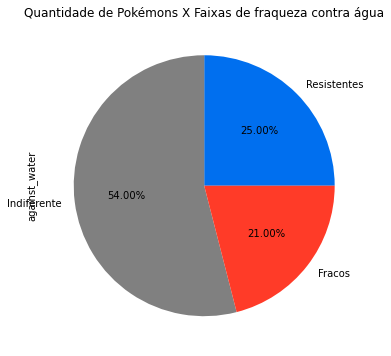

In [23]:
series_fraqueza_water_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_water")
criar_grafico_pizza_series_fraquezas(series_fraqueza_water_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra água")

## 2 Pokémons do tipo normal 🐨

In [24]:
df_pkmn_gen2_normal = criar_df_pkmn_tipo(df_pkmn, 'normal')
df_pkmn_gen2_normal.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
9,Sentret,normal,none,35,46,34,35,45,20,2,...,215,255,Scout Pokémon,1000000,0.8,Otachiオタチ,50.0,161,6.0,0
10,Furret,normal,none,85,76,64,45,55,90,2,...,415,90,Long Body Pokémon,1000000,1.8,Ootachiオオタチ,50.0,162,32.5,0
11,Hoothoot,normal,flying,60,30,30,36,56,50,2,...,262,255,Owl Pokémon,1000000,0.7,Hohoホーホー,50.0,163,21.2,0
12,Noctowl,normal,flying,100,50,50,86,96,70,2,...,452,90,Owl Pokémon,1000000,1.6,Yorunozukuヨルノズク,50.0,164,40.8,0
22,Igglybuff,normal,fairy,90,30,15,40,20,15,2,...,210,170,Balloon Pokémon,800000,0.3,Pupurinププリン,24.6,174,1.0,0


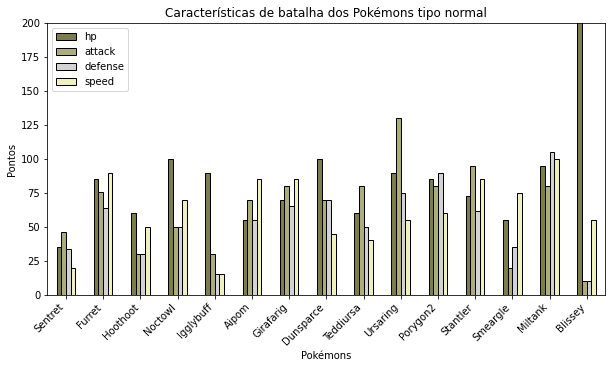

In [25]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_normal, ['#7C7C4C', '#ADAD7C', 'lightgray', '#F0F0BF'], 'black', "Características de batalha dos Pokémons tipo normal")

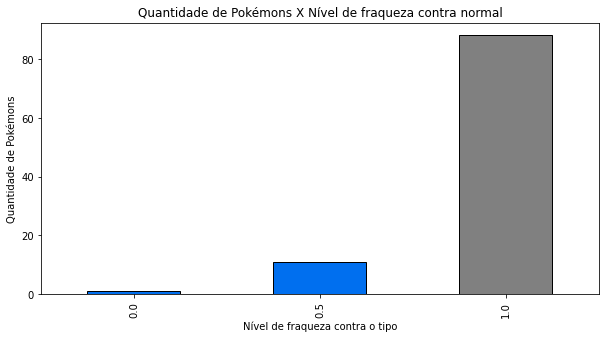

In [26]:
series_fraqueza_normal = criar_series_fraquezas(df_pkmn, 'against_normal')
criar_grafico_series_fraquezas(series_fraqueza_normal, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra normal")

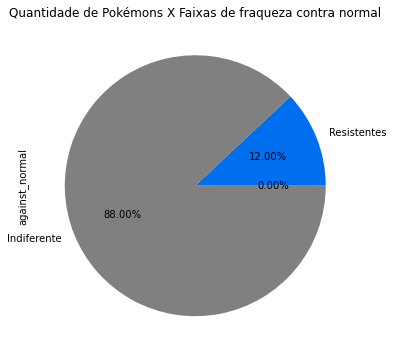

In [27]:
series_fraqueza_normal_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_normal")
criar_grafico_pizza_series_fraquezas(series_fraqueza_normal_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra normal")

## 3 Pokémons do tipo inseto 🐝

In [28]:
df_pkmn_gen2_bug = criar_df_pkmn_tipo(df_pkmn, 'bug')
df_pkmn_gen2_bug.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
13,Ledyba,bug,flying,40,20,30,40,80,55,2,...,265,255,Five Star Pokémon,800000,1.0,Redibaレディバ,50.0,165,10.8,0
14,Ledian,bug,flying,55,35,50,55,110,85,2,...,390,90,Five Star Pokémon,800000,1.4,Redianレディアン,50.0,166,35.6,0
15,Spinarak,bug,poison,40,60,40,40,40,30,2,...,250,255,String Spit Pokémon,800000,0.5,Itomaruイトマル,50.0,167,8.5,0
16,Ariados,bug,poison,70,90,70,60,70,40,2,...,400,90,Long Leg Pokémon,800000,1.1,Ariadosアリアドス,50.0,168,33.5,0
41,Yanma,bug,flying,65,65,45,75,45,95,2,...,390,75,Clear Wing Pokémon,1000000,1.2,Yanyanmaヤンヤンマ,50.0,193,38.0,0


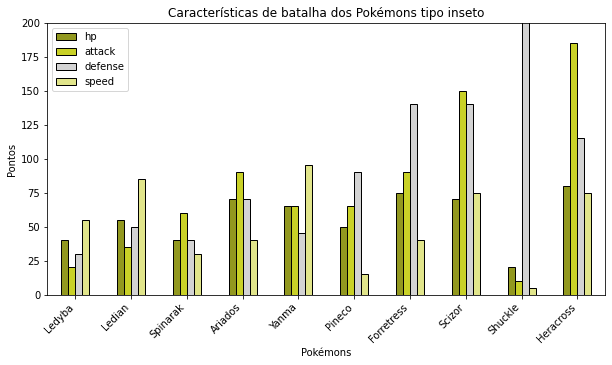

In [29]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_bug, ['#92981F', '#C9D127', 'lightgray', '#E1E58B'], 'black', "Características de batalha dos Pokémons tipo inseto")

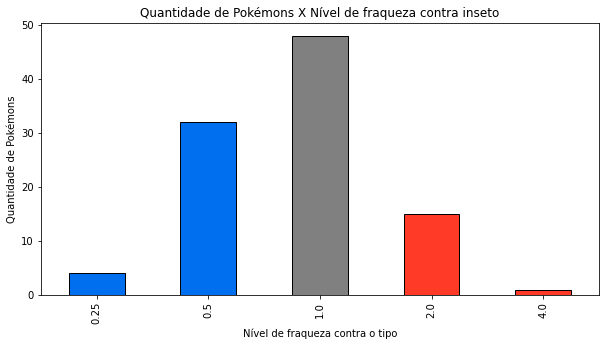

In [30]:
series_fraqueza_bug = criar_series_fraquezas(df_pkmn, 'against_bug')
criar_grafico_series_fraquezas(series_fraqueza_bug, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra inseto")

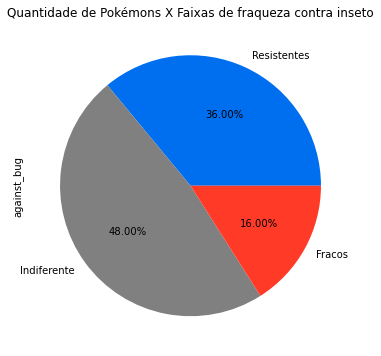

In [31]:
series_fraqueza_bug_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_bug")
criar_grafico_pizza_series_fraquezas(series_fraqueza_bug_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra inseto")

## 4 Pokémons do tipo planta 🌱

In [32]:
df_pkmn_gen2_grass = criar_df_pkmn_tipo(df_pkmn, 'grass')
df_pkmn_gen2_grass.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
0,Chikorita,grass,none,45,49,65,49,65,45,2,...,318,45,Leaf Pokémon,1059860,0.9,Chicoritaチコリータ,88.1,152,6.4,0
1,Bayleef,grass,none,60,62,80,63,80,60,2,...,405,45,Leaf Pokémon,1059860,1.2,Bayleafベイリーフ,88.1,153,15.8,0
2,Meganium,grass,none,80,82,100,83,100,80,2,...,525,45,Herb Pokémon,1059860,1.8,Meganiumメガニウム,88.1,154,100.5,0
30,Bellossom,grass,none,75,80,95,90,100,50,2,...,490,45,Flower Pokémon,1059860,0.4,Kireihanaキレイハナ,50.0,182,5.8,0
35,Hoppip,grass,flying,35,35,40,35,55,50,2,...,250,255,Cottonweed Pokémon,1059860,0.4,Haneccoハネッコ,50.0,187,0.5,0


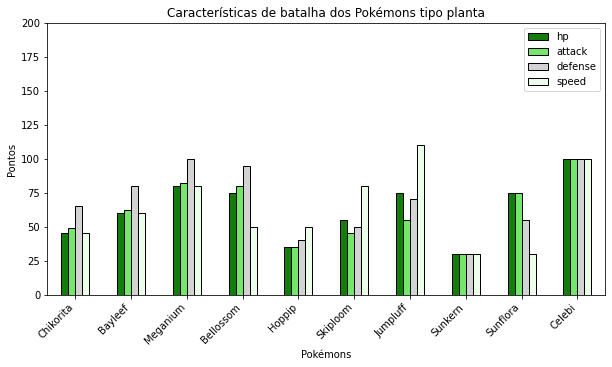

In [33]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_grass, ['#137D0B', '#74E76B', 'lightgray', '#ECFFEA'], 'black', "Características de batalha dos Pokémons tipo planta")

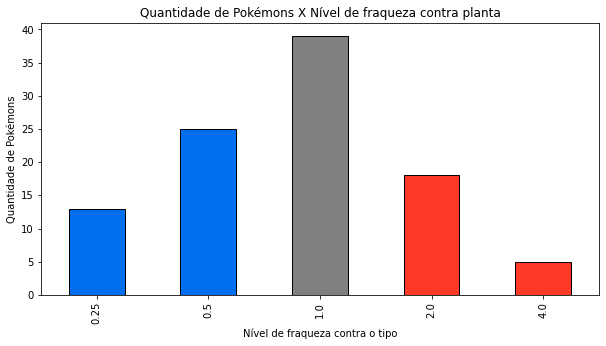

In [34]:
series_fraqueza_grass = criar_series_fraquezas(df_pkmn, 'against_grass')
criar_grafico_series_fraquezas(series_fraqueza_grass, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra planta")

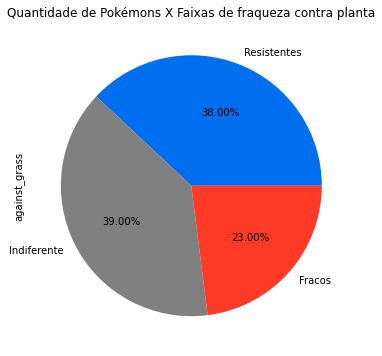

In [35]:
series_fraqueza_grass_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_grass")
criar_grafico_pizza_series_fraquezas(series_fraqueza_grass_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra planta")

## 5 Pokémons do tipo fogo 🔥

In [36]:
df_pkmn_gen2_fire = criar_df_pkmn_tipo(df_pkmn, 'fire')
df_pkmn_gen2_fire.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
3,Cyndaquil,fire,none,39,52,43,60,50,65,2,...,309,45,Fire Mouse Pokémon,1059860,0.5,Hinoarashiヒノアラシ,88.1,155,7.9,0
4,Quilava,fire,none,58,64,58,80,65,80,2,...,405,45,Volcano Pokémon,1059860,0.9,Magmarashiマグマラシ,88.1,156,19.0,0
5,Typhlosion,fire,none,78,84,78,109,85,100,2,...,534,45,Volcano Pokémon,1059860,1.7,Bakphoonバクフーン,88.1,157,79.5,0
66,Slugma,fire,none,40,40,40,70,40,20,2,...,250,190,Lava Pokémon,1000000,0.7,Magmagマグマッグ,50.0,218,35.0,0
67,Magcargo,fire,rock,60,50,120,90,80,30,2,...,430,75,Lava Pokémon,1000000,0.8,Magcargotマグカルゴ,50.0,219,55.0,0


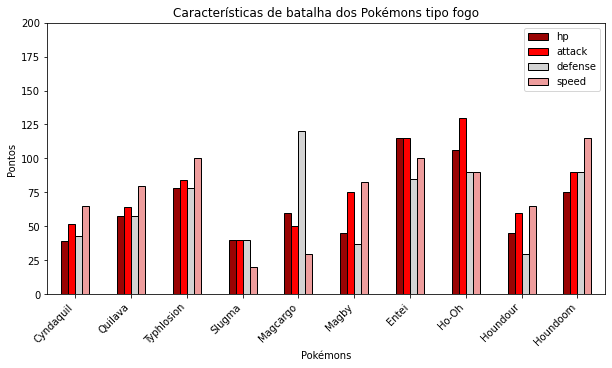

In [37]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_fire, ['#990303', '#FF0000', 'lightgray', '#EE9D9D'], 'black', "Características de batalha dos Pokémons tipo fogo")

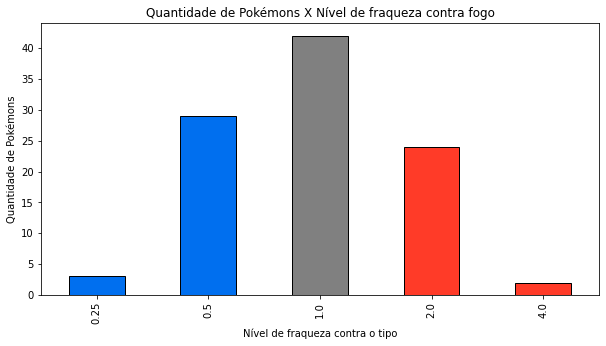

In [38]:
series_fraqueza_fire = criar_series_fraquezas(df_pkmn, 'against_fire')
criar_grafico_series_fraquezas(series_fraqueza_fire, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra fogo")

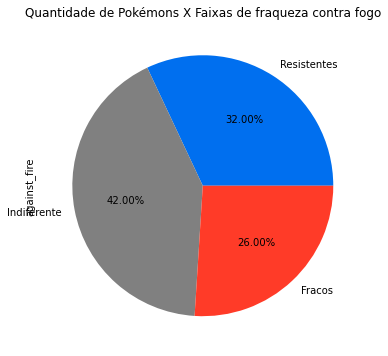

In [39]:
series_fraqueza_fire_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_fire")
criar_grafico_pizza_series_fraquezas(series_fraqueza_fire_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra fogo")

## 6 Pokémons do tipo psíquico 🧿

In [40]:
df_pkmn_gen2_psychic = criar_df_pkmn_tipo(df_pkmn, 'psychic')
df_pkmn_gen2_psychic.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
25,Natu,psychic,flying,40,50,45,70,45,70,2,...,320,190,Little Bird Pokémon,1000000,0.2,Natyネイティ,50.0,177,2.0,0
26,Xatu,psychic,flying,65,75,70,95,70,95,2,...,470,75,Mystic Pokémon,1000000,1.5,Natioネイティオ,50.0,178,15.0,0
44,Espeon,psychic,none,65,65,60,130,95,110,2,...,525,45,Sun Pokémon,1000000,0.9,Eifieエーフィ,88.1,196,26.5,0
49,Unown,psychic,none,48,72,48,72,48,48,2,...,336,225,Symbol Pokémon,1000000,0.5,Unknownアンノーン,NaN,201,5.0,0
50,Wobbuffet,psychic,none,190,33,58,33,58,33,2,...,405,45,Patient Pokémon,1000000,1.3,Sonansソーナンス,50.0,202,28.5,0


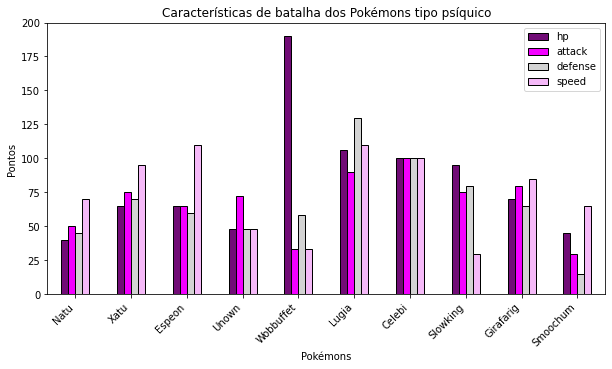

In [41]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_psychic, ['#710C76', '#F300FF', 'lightgray', '#F5B9F8'], 'black', "Características de batalha dos Pokémons tipo psíquico")

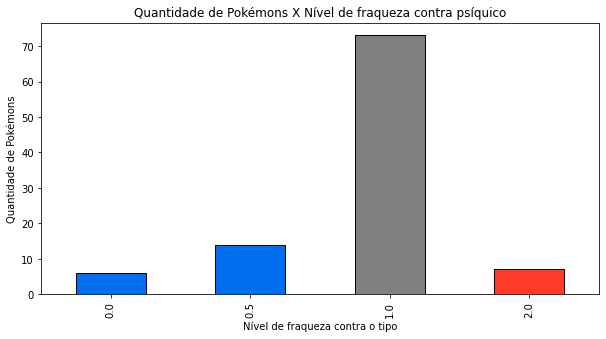

In [42]:
series_fraqueza_psychic = criar_series_fraquezas(df_pkmn, 'against_psychic')
criar_grafico_series_fraquezas(series_fraqueza_psychic, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra psíquico")

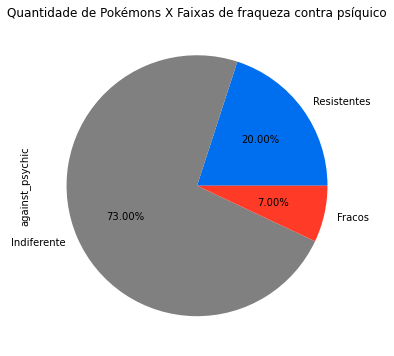

In [43]:
series_fraqueza_psychic_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_psychic")
criar_grafico_pizza_series_fraquezas(series_fraqueza_psychic_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra psíquico")

## 7 Pokémons do tipo elétrico ⚡

In [52]:
df_pkmn_gen2_electric = criar_df_pkmn_tipo(df_pkmn, 'electric')
df_pkmn_gen2_electric.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
20,Pichu,electric,none,20,40,15,35,35,60,2,...,205,190,Tiny Mouse Pokémon,1000000,0.3,Pichuピチュー,50.0,172,2.0,0
27,Mareep,electric,none,55,40,40,65,45,35,2,...,280,235,Wool Pokémon,1059860,0.6,Merriepメリープ,50.0,179,7.8,0
28,Flaaffy,electric,none,70,55,55,80,60,45,2,...,365,120,Wool Pokémon,1059860,0.8,Mokokoモココ,50.0,180,13.3,0
29,Ampharos,electric,none,90,95,105,165,110,45,2,...,610,45,Light Pokémon,1059860,1.4,Denryuデンリュウ,50.0,181,61.5,0
87,Elekid,electric,none,45,63,37,65,55,95,2,...,360,45,Electric Pokémon,1000000,0.6,Elekidエレキッド,75.4,239,23.5,0


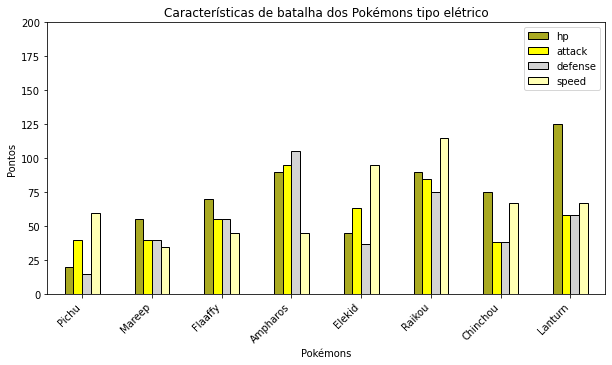

In [57]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_electric, ['#A9A922', '#FFFF00', 'lightgray', '#FFFFB4'], 'black', "Características de batalha dos Pokémons tipo elétrico")

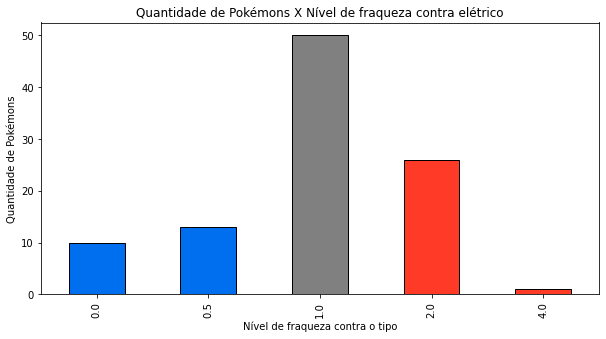

In [55]:
series_fraqueza_electric = criar_series_fraquezas(df_pkmn, 'against_electric')
criar_grafico_series_fraquezas(series_fraqueza_electric, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra elétrico")

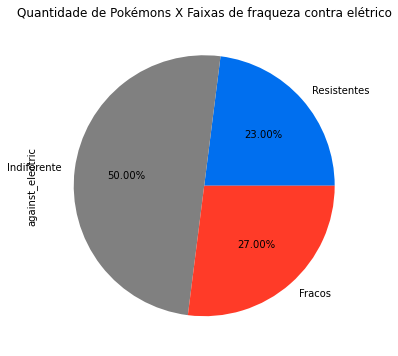

In [56]:
series_fraqueza_electric_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_electric")
criar_grafico_pizza_series_fraquezas(series_fraqueza_electric_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra elétrico")

## 8 Pokémons do tipo fada 🧚‍♀️

In [58]:
df_pkmn_gen2_fairy = criar_df_pkmn_tipo(df_pkmn, 'fairy')
df_pkmn_gen2_fairy.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
21,Cleffa,fairy,none,50,25,28,45,55,15,2,...,218,150,Star Shape Pokémon,800000,0.3,Pyピィ,24.6,173,3.0,0
23,Togepi,fairy,none,35,20,65,40,65,20,2,...,245,190,Spike Ball Pokémon,800000,0.3,Togepyトゲピー,88.1,175,1.5,0
24,Togetic,fairy,flying,55,40,85,80,105,40,2,...,405,75,Happiness Pokémon,800000,0.6,Togechickトゲチック,88.1,176,3.2,0
57,Snubbull,fairy,none,60,80,50,40,40,30,2,...,300,190,Fairy Pokémon,800000,0.6,Buluブルー,24.6,209,7.8,0
58,Granbull,fairy,none,90,120,75,60,60,45,2,...,450,75,Fairy Pokémon,800000,1.4,Granbuluグランブル,24.6,210,48.7,0


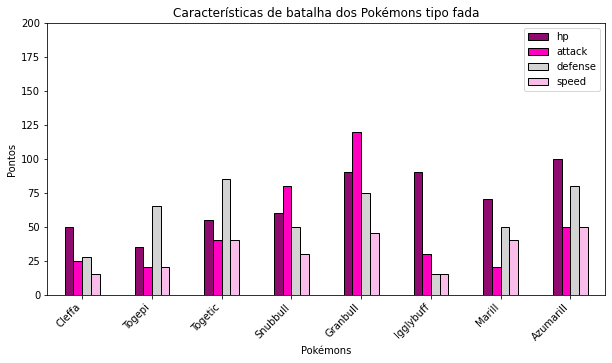

In [63]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_fairy, ['#900B70', '#FF00C1', 'lightgray', '#F9BDEA'], 'black', "Características de batalha dos Pokémons tipo fada")

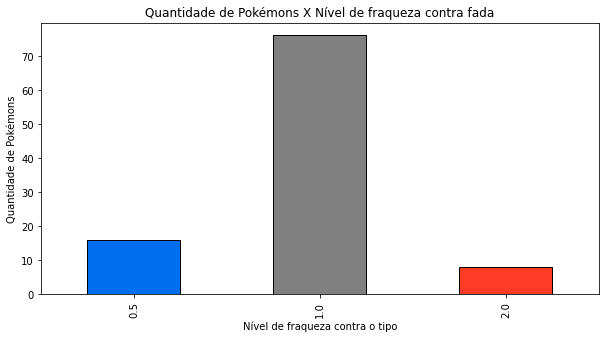

In [62]:
series_fraqueza_fairy = criar_series_fraquezas(df_pkmn, 'against_fairy')
criar_grafico_series_fraquezas(series_fraqueza_fairy, ['#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra fada")

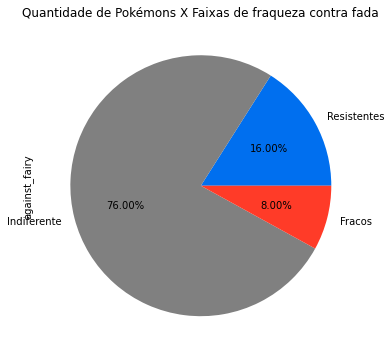

In [61]:
series_fraqueza_fairy_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_fairy")
criar_grafico_pizza_series_fraquezas(series_fraqueza_fairy_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra fada")

## 9 Pokémons do tipo sombrio 🌑 

In [64]:
df_pkmn_gen2_dark = criar_df_pkmn_tipo(df_pkmn, 'dark')
df_pkmn_gen2_dark.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
45,Umbreon,dark,none,95,65,110,60,130,65,2,...,525,45,Moonlight Pokémon,1000000,1.0,Blackyブラッキー,88.1,197,27.0,0
46,Murkrow,dark,flying,60,85,42,85,42,91,2,...,405,30,Darkness Pokémon,1059860,0.5,Yamikarasuヤミカラス,50.0,198,2.1,0
63,Sneasel,dark,ice,55,95,55,35,75,115,2,...,430,60,Sharp Claw Pokémon,1059860,0.9,Nyulaニューラ,50.0,215,28.0,0
76,Houndour,dark,fire,45,60,30,80,50,65,2,...,330,120,Dark Pokémon,1250000,0.6,Delvilデルビル,50.0,228,10.8,0
77,Houndoom,dark,fire,75,90,90,140,90,115,2,...,600,45,Dark Pokémon,1250000,1.4,Hellgarヘルガー,50.0,229,35.0,0


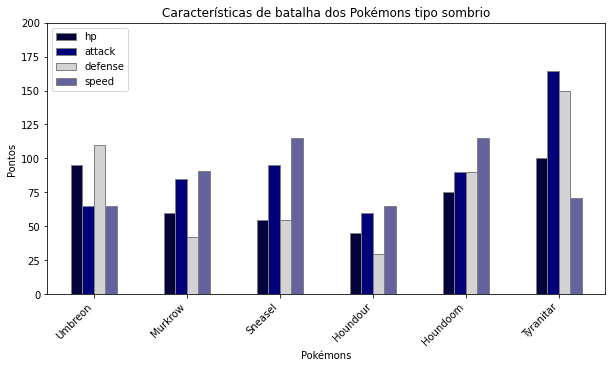

In [131]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_dark, ['#03023B', '#03017A', 'lightgray', '#64639E'], 'gray', "Características de batalha dos Pokémons tipo sombrio")

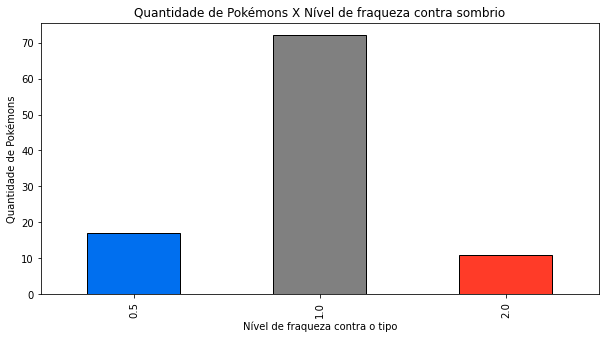

In [68]:
series_fraqueza_dark = criar_series_fraquezas(df_pkmn, 'against_dark')
criar_grafico_series_fraquezas(series_fraqueza_dark, ['#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra sombrio")

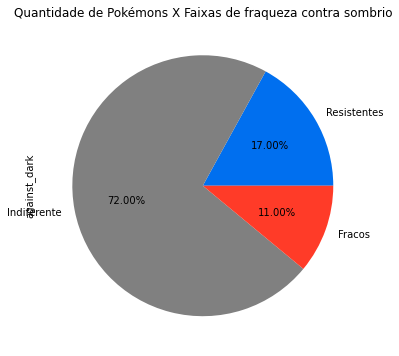

In [67]:
series_fraqueza_dark_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_dark")
criar_grafico_pizza_series_fraquezas(series_fraqueza_dark_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra sombrio")

## 10 Pokémons do tipo pedra 🗿

In [72]:
df_pkmn_gen2_rock = criar_df_pkmn_tipo(df_pkmn, 'rock')
df_pkmn_gen2_rock.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
33,Sudowoodo,rock,none,70,100,115,30,65,30,2,...,410,65,Imitation Pokémon,1000000,1.2,Usokkieウソッキー,50.0,185,38.0,0
94,Larvitar,rock,ground,50,64,50,45,50,41,2,...,300,45,Rock Skin Pokémon,1250000,0.6,Yogirasヨーギラス,50.0,246,72.0,0
95,Pupitar,rock,ground,70,84,70,65,70,51,2,...,410,45,Hard Shell Pokémon,1250000,1.2,Sanagirasサナギラス,50.0,247,152.0,0
96,Tyranitar,rock,dark,100,164,150,95,120,71,2,...,700,45,Armor Pokémon,1250000,2.0,Bangirasバンギラス,50.0,248,202.0,0
61,Shuckle,bug,rock,20,10,230,10,230,5,2,...,505,190,Mold Pokémon,1059860,0.6,Tsubotsuboツボツボ,50.0,213,20.5,0


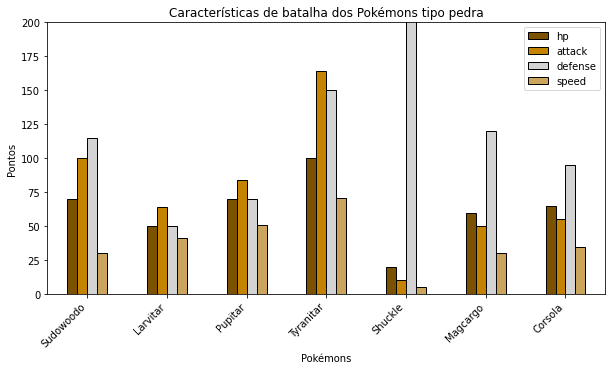

In [79]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_rock, ['#7A5201', '#C48300', 'lightgray', '#CAA55B'], 'black', "Características de batalha dos Pokémons tipo pedra")

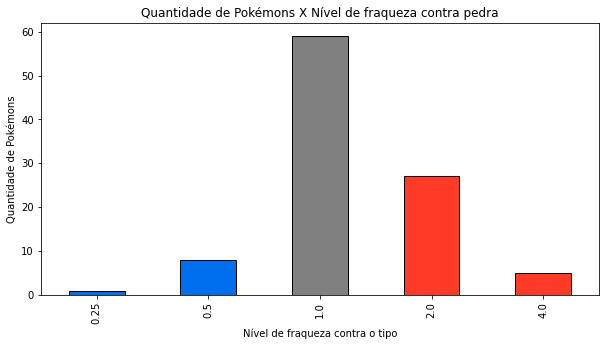

In [77]:
series_fraqueza_rock = criar_series_fraquezas(df_pkmn, 'against_rock')
criar_grafico_series_fraquezas(series_fraqueza_rock, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra pedra")

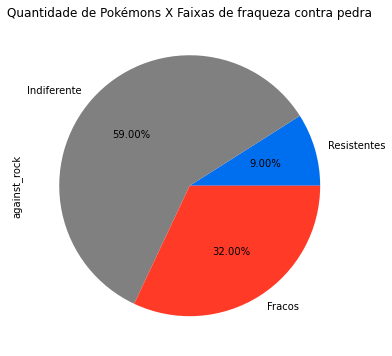

In [78]:
series_fraqueza_rock_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_rock")
criar_grafico_pizza_series_fraquezas(series_fraqueza_rock_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra pedra")

## 11 Pokémons do tipo gelo ⛄

In [80]:
df_pkmn_gen2_ice = criar_df_pkmn_tipo(df_pkmn, 'ice')
df_pkmn_gen2_ice.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
68,Swinub,ice,ground,50,50,40,30,30,50,2,...,250,225,Pig Pokémon,1250000,0.4,Urimooウリムー,50.0,220,6.5,0
69,Piloswine,ice,ground,100,100,80,60,60,50,2,...,450,75,Swine Pokémon,1250000,1.1,Inomooイノムー,50.0,221,55.8,0
73,Delibird,ice,flying,45,55,45,65,45,75,2,...,330,45,Delivery Pokémon,800000,0.9,Delibirdデリバード,50.0,225,16.0,0
86,Smoochum,ice,psychic,45,30,15,85,65,65,2,...,305,45,Kiss Pokémon,1000000,0.4,Muchulムチュール,0.0,238,6.0,0
63,Sneasel,dark,ice,55,95,55,35,75,115,2,...,430,60,Sharp Claw Pokémon,1059860,0.9,Nyulaニューラ,50.0,215,28.0,0


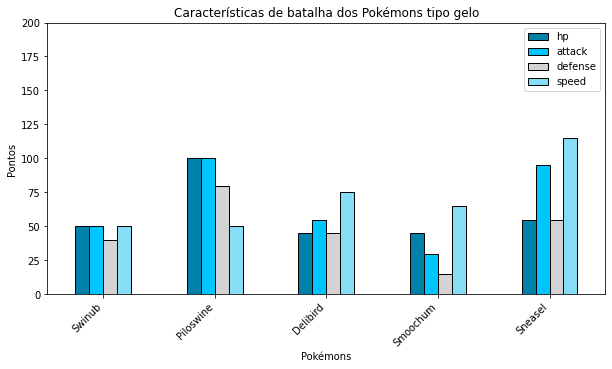

In [85]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_ice, ['#0081A7', '#00C5FF', 'lightgray', '#86DDF6'], 'black', "Características de batalha dos Pokémons tipo gelo")

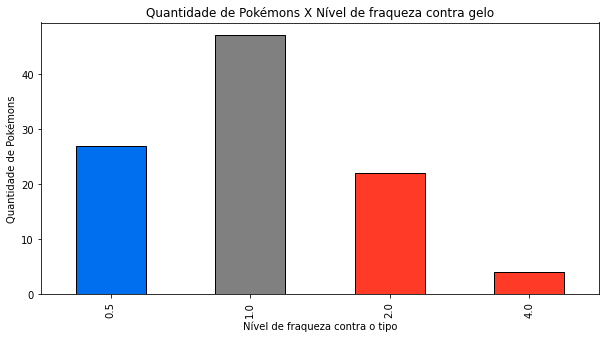

In [84]:
series_fraqueza_ice = criar_series_fraquezas(df_pkmn, 'against_ice')
criar_grafico_series_fraquezas(series_fraqueza_ice, ['#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra gelo")

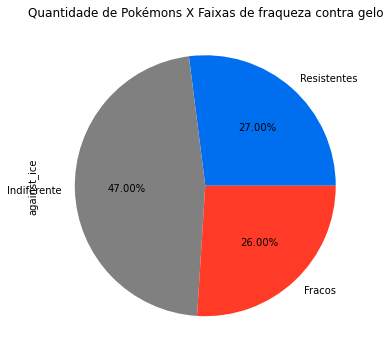

In [83]:
series_fraqueza_ice_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_ice")
criar_grafico_pizza_series_fraquezas(series_fraqueza_ice_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra gelo")

## 12 Pokémons do tipo terrestre 🗻

In [86]:
df_pkmn_gen2_ground = criar_df_pkmn_tipo(df_pkmn, 'ground')
df_pkmn_gen2_ground.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
55,Gligar,ground,flying,65,75,105,35,65,85,2,...,430,60,Flyscorpion Pokémon,1059860,1.1,Gligerグライガー,50.0,207,64.8,0
79,Phanpy,ground,none,90,60,60,40,40,40,2,...,330,120,Long Nose Pokémon,1000000,0.5,Gomazouゴマゾウ,50.0,231,33.5,0
80,Donphan,ground,none,90,120,120,60,60,50,2,...,500,60,Armor Pokémon,1000000,1.1,Donfanドンファン,50.0,232,120.0,0
42,Wooper,water,ground,55,45,45,25,25,15,2,...,210,255,Water Fish Pokémon,1000000,0.4,Upahウパー,50.0,194,8.5,0
43,Quagsire,water,ground,95,85,85,65,65,35,2,...,430,90,Water Fish Pokémon,1000000,1.4,Nuohヌオー,50.0,195,75.0,0


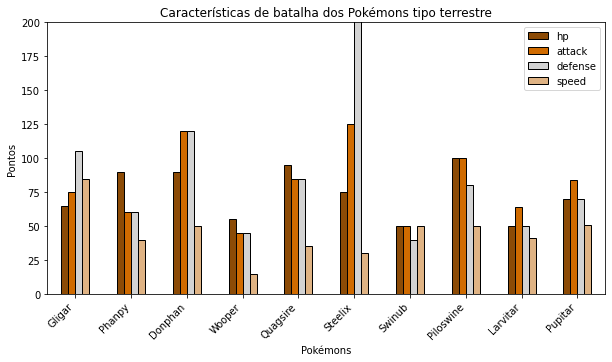

In [90]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_ground, ['#8C4B06', '#D06B00', 'lightgray', '#DFB384'], 'black', "Características de batalha dos Pokémons tipo terrestre")

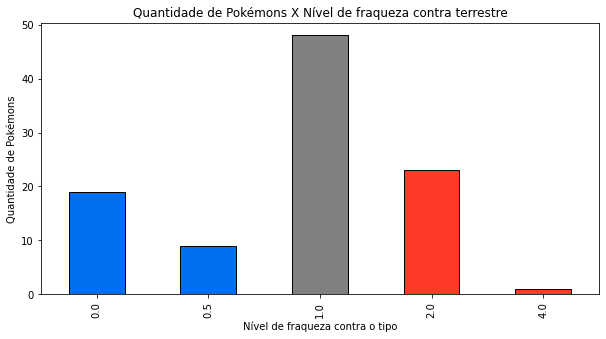

In [88]:
series_fraqueza_ground = criar_series_fraquezas(df_pkmn, 'against_ground')
criar_grafico_series_fraquezas(series_fraqueza_ground, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra terrestre")

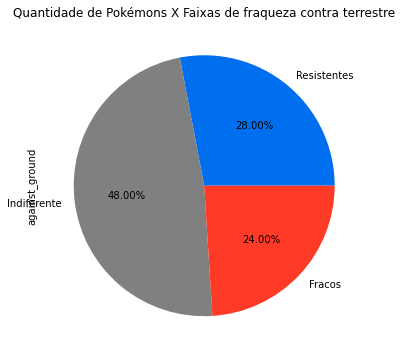

In [89]:
series_fraqueza_ground_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_ground")
criar_grafico_pizza_series_fraquezas(series_fraqueza_ground_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra terrestre")

## 13 Pokémons do tipo aço 🔧

In [91]:
df_pkmn_gen2_steel = criar_df_pkmn_tipo(df_pkmn, 'steel')
df_pkmn_gen2_steel.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
56,Steelix,steel,ground,75,125,230,55,95,30,2,...,610,25,Iron Snake Pokémon,1000000,9.2,Haganeilハガネール,50.0,208,400.0,0
75,Skarmory,steel,flying,65,80,140,40,70,70,2,...,465,25,Armor Bird Pokémon,1250000,1.7,Airmdエアームド,50.0,227,50.5,0
53,Forretress,bug,steel,75,90,140,60,60,40,2,...,465,75,Bagworm Pokémon,1000000,1.2,Foretosフォレトス,50.0,205,125.8,0
60,Scizor,bug,steel,70,150,140,65,100,75,2,...,600,25,Pincer Pokémon,1000000,1.8,Hassamハッサム,50.0,212,118.0,0


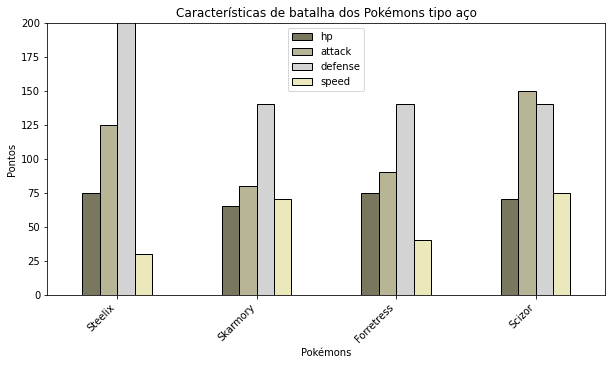

In [96]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_steel, ['#79775E', '#B8B597', 'lightgray', '#EBE8BC'], 'black', "Características de batalha dos Pokémons tipo aço")

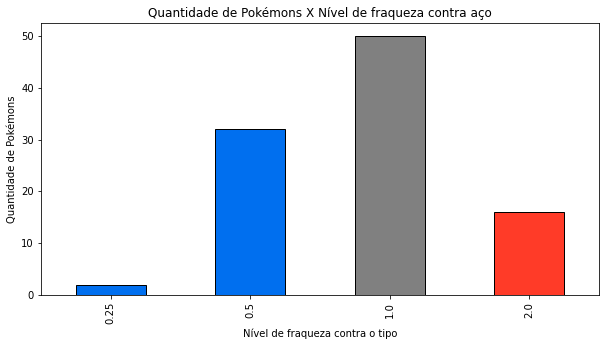

In [93]:
series_fraqueza_steel = criar_series_fraquezas(df_pkmn, 'against_steel')
criar_grafico_series_fraquezas(series_fraqueza_steel, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra aço")

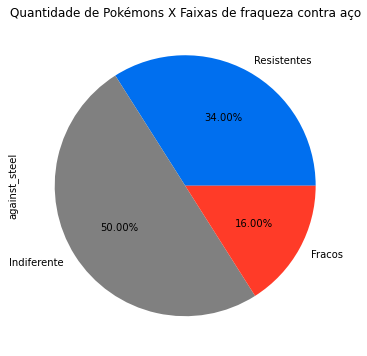

In [94]:
series_fraqueza_steel_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_steel")
criar_grafico_pizza_series_fraquezas(series_fraqueza_steel_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra aço")

## 14 Pokémons do tipo lutador 🥊

In [98]:
df_pkmn_gen2_fighting = criar_df_pkmn_tipo(df_pkmn, 'fighting')
df_pkmn_gen2_fighting.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
84,Tyrogue,fighting,none,35,35,35,35,35,35,2,...,210,75,Scuffle Pokémon,1000000,0.7,Balkieバルキー,100.0,236,21.0,0
85,Hitmontop,fighting,none,50,95,95,35,110,70,2,...,455,45,Handstand Pokémon,1000000,1.4,Kapoererカポエラー,100.0,237,48.0,0
62,Heracross,bug,fighting,80,185,115,40,105,75,2,...,600,45,Singlehorn Pokémon,1250000,1.5,Heracrosヘラクロス,50.0,214,54.0,0


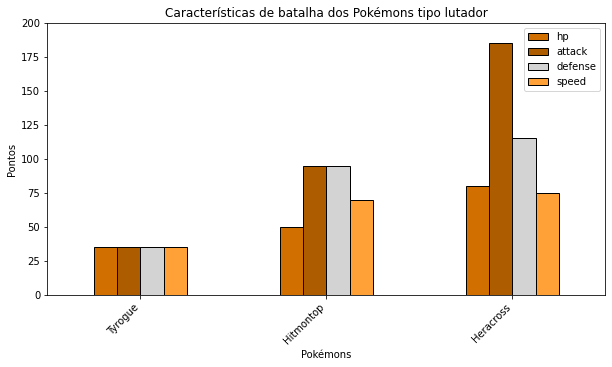

In [104]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_fighting, ['#D16F00', '#AE5C00', 'lightgray', '#FFA137'], 'black', "Características de batalha dos Pokémons tipo lutador")

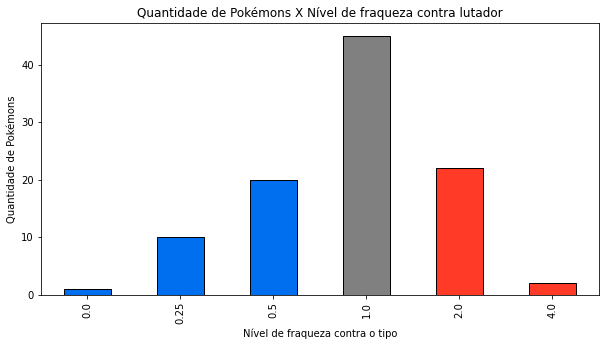

In [103]:
series_fraqueza_fighting = criar_series_fraquezas(df_pkmn, 'against_fight')
criar_grafico_series_fraquezas(series_fraqueza_fighting, ['#006FEF', '#006FEF','#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra lutador")

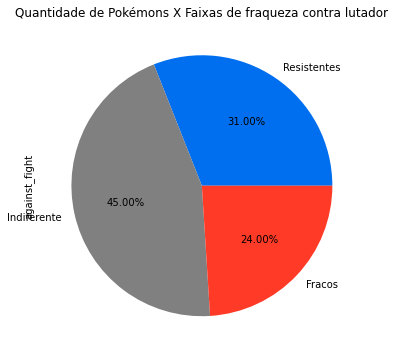

In [102]:
series_fraqueza_fighting_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_fight")
criar_grafico_pizza_series_fraquezas(series_fraqueza_fighting_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra lutador")

## 15 Pokémons do tipo venenoso 🦂

In [105]:
df_pkmn_gen2_poison = criar_df_pkmn_tipo(df_pkmn, 'poison')
df_pkmn_gen2_poison.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
17,Crobat,poison,flying,85,90,80,70,80,130,2,...,535,90,Bat Pokémon,1000000,1.8,Crobatクロバット,50.0,169,75.0,0
15,Spinarak,bug,poison,40,60,40,40,40,30,2,...,250,255,String Spit Pokémon,800000,0.5,Itomaruイトマル,50.0,167,8.5,0
16,Ariados,bug,poison,70,90,70,60,70,40,2,...,400,90,Long Leg Pokémon,800000,1.1,Ariadosアリアドス,50.0,168,33.5,0
59,Qwilfish,water,poison,65,95,85,55,55,85,2,...,440,45,Balloon Pokémon,1000000,0.5,Harysenハリーセン,50.0,211,3.9,0


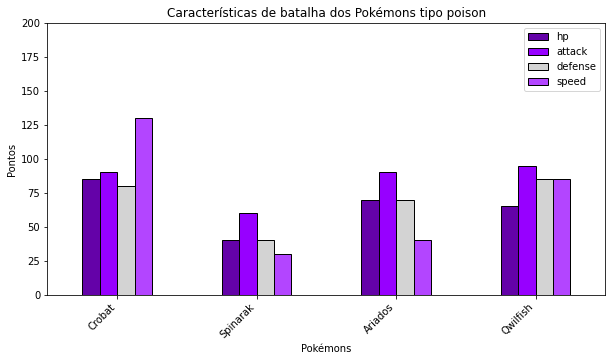

In [110]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_poison, ['#6402A8', '#9700FF', 'lightgray', '#B345FF'], 'black', "Características de batalha dos Pokémons tipo poison")

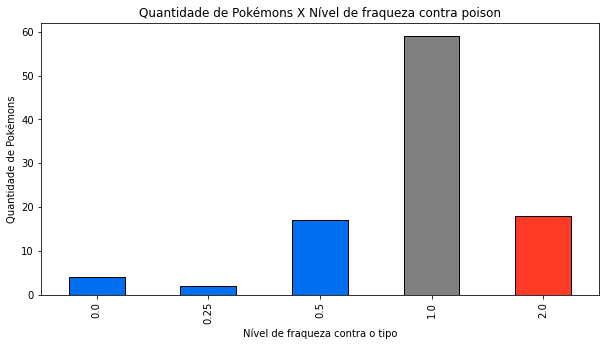

In [109]:
series_fraqueza_poison = criar_series_fraquezas(df_pkmn, 'against_poison')
criar_grafico_series_fraquezas(series_fraqueza_poison, ['#006FEF', '#006FEF','#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra poison")

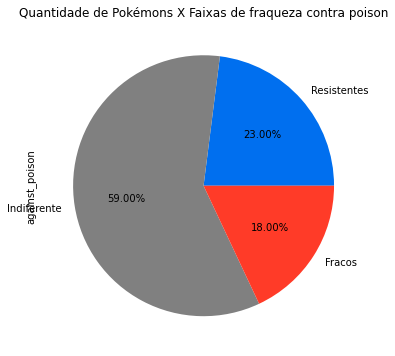

In [108]:
series_fraqueza_poison_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_poison")
criar_grafico_pizza_series_fraquezas(series_fraqueza_poison_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra poison")

## 16 Pokémons do tipo fantasma 👻

In [111]:
df_pkmn_gen2_ghost = criar_df_pkmn_tipo(df_pkmn, 'ghost')
df_pkmn_gen2_ghost.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
48,Misdreavus,ghost,none,60,60,60,85,85,85,2,...,435,45,Screech Pokémon,800000,0.7,Mumaムウマ,50.0,200,1.0,0


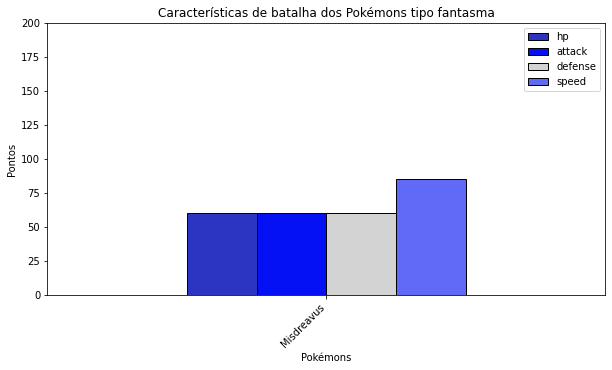

In [116]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_ghost, ['#2C34C2', '#0411F5', 'lightgray', '#6169F7'], 'black', "Características de batalha dos Pokémons tipo fantasma")

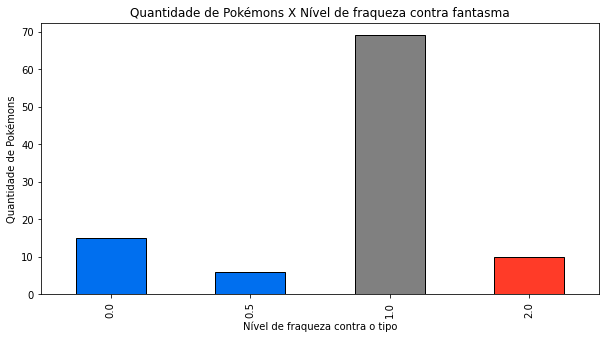

In [113]:
series_fraqueza_ghost = criar_series_fraquezas(df_pkmn, 'against_ghost')
criar_grafico_series_fraquezas(series_fraqueza_ghost, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra fantasma")

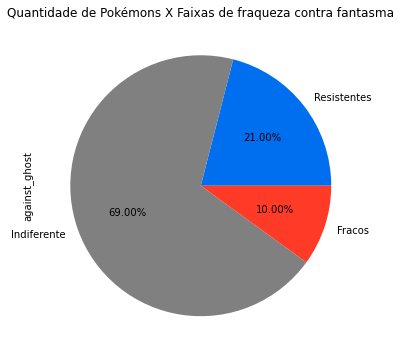

In [114]:
series_fraqueza_ghost_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_ghost")
criar_grafico_pizza_series_fraquezas(series_fraqueza_ghost_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra fantasma")

## 17 Pokémons do tipo voador 🦅 

In [117]:
df_pkmn_gen2_flying = criar_df_pkmn_tipo(df_pkmn, 'flying')
df_pkmn_gen2_flying.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
11,Hoothoot,normal,flying,60,30,30,36,56,50,2,...,262,255,Owl Pokémon,1000000,0.7,Hohoホーホー,50.0,163,21.2,0
12,Noctowl,normal,flying,100,50,50,86,96,70,2,...,452,90,Owl Pokémon,1000000,1.6,Yorunozukuヨルノズク,50.0,164,40.8,0
13,Ledyba,bug,flying,40,20,30,40,80,55,2,...,265,255,Five Star Pokémon,800000,1.0,Redibaレディバ,50.0,165,10.8,0
14,Ledian,bug,flying,55,35,50,55,110,85,2,...,390,90,Five Star Pokémon,800000,1.4,Redianレディアン,50.0,166,35.6,0
17,Crobat,poison,flying,85,90,80,70,80,130,2,...,535,90,Bat Pokémon,1000000,1.8,Crobatクロバット,50.0,169,75.0,0


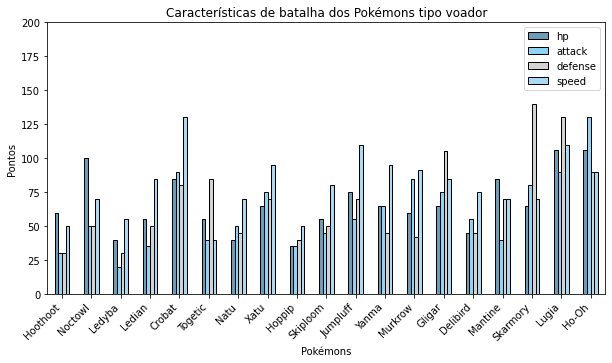

In [122]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_flying, ['#699DB8', '#8ED4F7', 'lightgray', '#A9DAF4'], 'black', "Características de batalha dos Pokémons tipo voador")

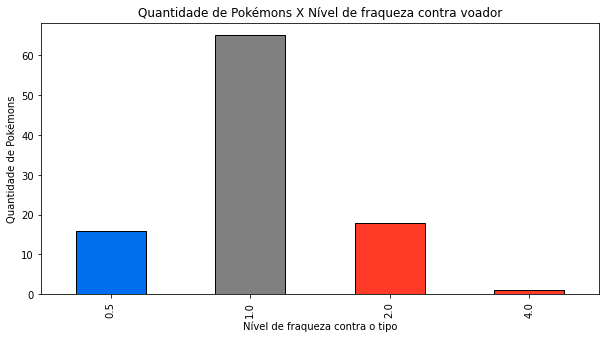

In [121]:
series_fraqueza_flying = criar_series_fraquezas(df_pkmn, 'against_flying')
criar_grafico_series_fraquezas(series_fraqueza_flying, ['#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra voador")

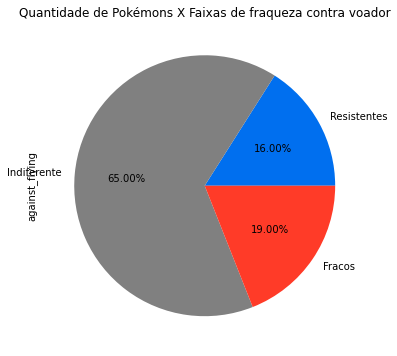

In [120]:
series_fraqueza_flying_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_flying")
criar_grafico_pizza_series_fraquezas(series_fraqueza_flying_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra voador")

## 18 Pokémons do tipo dragão 🐲

In [123]:
df_pkmn_gen2_dragon = criar_df_pkmn_tipo(df_pkmn, 'dragon')
df_pkmn_gen2_dragon.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
78,Kingdra,water,dragon,75,95,95,95,95,85,2,...,540,45,Dragon Pokémon,1000000,1.8,Kingdraキングドラ,50.0,230,152.0,0


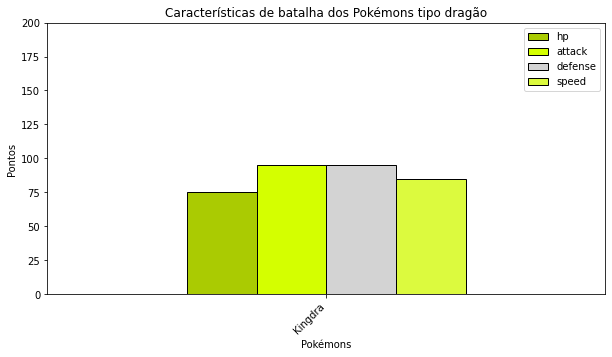

In [127]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_dragon, ['#AACB02', '#D4FF00', 'lightgray', '#DCFA3E'], 'black', "Características de batalha dos Pokémons tipo dragão")

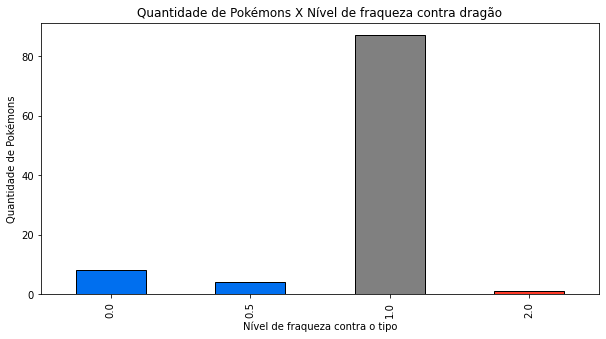

In [125]:
series_fraqueza_dragon = criar_series_fraquezas(df_pkmn, 'against_dragon')
criar_grafico_series_fraquezas(series_fraqueza_dragon, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra dragão")

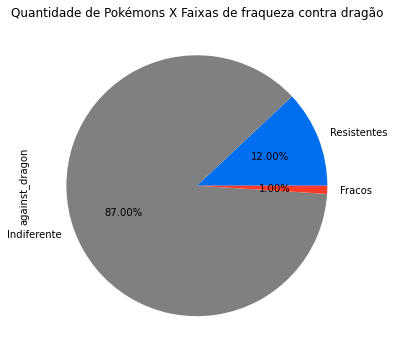

In [126]:
series_fraqueza_dragon_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_dragon")
criar_grafico_pizza_series_fraquezas(series_fraqueza_dragon_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra dragão")